In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('weather.csv')
print('Ukuran dataset :', data.shape)
data[0:5]

Ukuran dataset : (145460, 24)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [2]:
#pre-processing
#find variabel with max null values
null_values_variabel = data.count().sort_values()
print(null_values_variabel)

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RISK_MM          142193
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64


In [3]:
#remove variabel that doesn't significant
data = data.drop(columns = ['Sunshine','Evaporation','Cloud9am','Location','RISK_MM','Date'],axis = 1)
print('Ukuran dataset :', data.shape)

Ukuran dataset : (145460, 18)


In [4]:
#remove all null value in data
data = data.dropna(how='any')
print('Ukuran dataset :', data.shape)

Ukuran dataset : (74279, 18)


In [5]:
#remove outlier using z-score
from scipy import stats
z = np.abs(stats.zscore(data._get_numeric_data()))
print(z)
data = data[(z < 3).all(axis = 1)]
print('Ukuran dataset :', data.shape)

[[0.03413131 0.2573358  0.27685336 ... 0.91431307 0.48180987 0.12271404]
 [0.67725878 1.17662856 0.16999965 ... 1.2949633  0.00193953 1.04567204]
 [0.42981875 0.29981134 0.04177521 ... 1.2949633  0.28916574 0.75764589]
 ...
 [0.57540638 0.16052455 0.27685336 ... 0.17788761 0.90896967 0.00508014]
 [0.7919164  0.43909812 0.27685336 ... 0.92675058 0.93920401 0.33166528]
 [0.82284641 0.43840861 0.27685336 ... 0.91431307 0.4101031  0.52029595]]
Ukuran dataset : (71043, 18)


In [6]:
#set categorical values from yes/no to 1/0
data['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [7]:
#set unique values to categorical values
categorical_variabel = ['WindGustDir','WindDir3pm','WindDir9am']
for col in categorical_variabel:
    print(np.unique(data[col]))
data = pd.get_dummies(data, columns = categorical_variabel)
data.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
16,14.1,20.9,0.0,22.0,11.0,9.0,69.0,82.0,1012.2,1010.4,...,0,0,0,0,0,1,0,0,0,0
17,13.5,22.9,16.8,63.0,6.0,20.0,80.0,65.0,1005.8,1002.2,...,0,0,0,0,0,0,0,0,0,0
18,11.2,22.5,10.6,43.0,24.0,17.0,47.0,32.0,1009.4,1009.7,...,0,0,0,0,0,0,0,0,0,1
21,17.1,33.0,0.0,43.0,17.0,22.0,38.0,28.0,1013.6,1008.1,...,0,0,0,0,0,0,0,0,0,0
25,16.2,33.9,0.0,35.0,9.0,13.0,45.0,19.0,1010.9,1007.6,...,0,0,0,1,0,0,0,0,0,0


In [8]:
#standarisasi data
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), index = data.index, columns = data.columns)
data.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
16,0.548209,0.408759,0.000000,0.180556,0.243243,0.166667,0.655556,0.82,0.380383,0.392771,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17,0.531680,0.457421,0.549020,0.750000,0.108108,0.428571,0.777778,0.65,0.227273,0.195181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.468320,0.447689,0.346405,0.472222,0.594595,0.357143,0.411111,0.32,0.313397,0.375904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21,0.630854,0.703163,0.000000,0.472222,0.405405,0.476190,0.311111,0.28,0.413876,0.337349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.606061,0.725061,0.000000,0.361111,0.189189,0.261905,0.388889,0.19,0.349282,0.325301,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.504132,0.489051,0.039216,0.569444,0.243243,0.476190,0.755556,0.70,0.222488,0.224096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
#choose the best predictor variabel
from sklearn.feature_selection import SelectKBest, chi2
x = data.loc[:, data.columns!= 'RainTomorrow']
y = data[['RainTomorrow']]
selector = SelectKBest(chi2, k = 2)
selector.fit(x, y)
x_new = selector.transform(x)
print(x.columns[selector.get_support(indices = True)])
data

Index(['Cloud3pm', 'RainToday'], dtype='object')


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
2,0.515152,0.525547,0.000000,0.513889,0.459459,0.571429,0.311111,0.30,0.270335,0.351807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.641873,0.686131,0.032680,0.444444,0.135135,0.428571,0.800000,0.33,0.346890,0.286747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.597796,0.428224,0.071895,0.305556,0.351351,0.261905,0.877778,0.91,0.339713,0.243373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.506887,0.411192,0.117647,0.486111,0.594595,0.428571,0.611111,0.43,0.117225,0.185542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16,0.548209,0.408759,0.000000,0.180556,0.243243,0.166667,0.655556,0.82,0.380383,0.392771,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145428,0.561983,0.540146,0.000000,0.388889,0.459459,0.428571,0.566667,0.36,0.614833,0.590361,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
145432,0.509642,0.440389,0.000000,0.388889,0.459459,0.261905,0.544444,0.34,0.669856,0.665060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145433,0.418733,0.452555,0.000000,0.361111,0.297297,0.357143,0.577778,0.32,0.724880,0.710843,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
145452,0.380165,0.403893,0.000000,0.444444,0.459459,0.571429,0.511111,0.32,0.760766,0.727711,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#show data to predict
data = data[['Cloud3pm','RainToday','RainTomorrow']]
x = data[['Cloud3pm','RainToday']]
y = data[['RainTomorrow']]
data

,Cloud3pm,RainToday,RainTomorrow
2,0.222222,0.0,0.0
4,0.888889,0.0,0.0
11,0.888889,1.0,1.0
13,0.777778,1.0,0.0
16,0.111111,0.0,1.0
...,...,...,...
145428,0.111111,0.0,0.0
145432,0.888889,0.0,0.0
145433,0.444444,0.0,0.0
145452,0.777778,0.0,0.0


In [11]:
pd.cut(data['Cloud3pm'], bins=2).value_counts()

(0.5, 1.0]       37600
(-0.001, 0.5]    33443
Name: Cloud3pm, dtype: int64

In [12]:
cut_labels = ['Tidak_Berawan', 'Berawan']
cut_bins = [-0.001, 0.5, 1.0]
data['Cloud3pm_code'] = pd.cut(data['Cloud3pm'], bins=cut_bins, labels=cut_labels)
data

<ipython-input-12-35be4426b096>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cloud3pm_code'] = pd.cut(data['Cloud3pm'], bins=cut_bins, labels=cut_labels)


,Cloud3pm,RainToday,RainTomorrow,Cloud3pm_code
2,0.222222,0.0,0.0,Tidak_Berawan
4,0.888889,0.0,0.0,Berawan
11,0.888889,1.0,1.0,Berawan
13,0.777778,1.0,0.0,Berawan
16,0.111111,0.0,1.0,Tidak_Berawan
...,...,...,...,...
145428,0.111111,0.0,0.0,Tidak_Berawan
145432,0.888889,0.0,0.0,Berawan
145433,0.444444,0.0,0.0,Tidak_Berawan
145452,0.777778,0.0,0.0,Berawan


In [13]:
#data eksploration
data['Cloud3pm_code'].value_counts()

Berawan          37600
Tidak_Berawan    33443
Name: Cloud3pm_code, dtype: int64

In [14]:
data['RainToday'].value_counts()

0.0    55412
1.0    15631
Name: RainToday, dtype: int64

In [15]:
data['RainTomorrow'].value_counts()

0.0    55402
1.0    15641
Name: RainTomorrow, dtype: int64

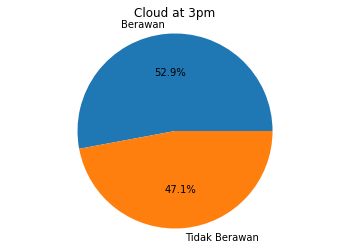

In [16]:
#pie chart of Cloud3pm
import matplotlib.pyplot as plt
labels = ['Berawan', 'Tidak Berawan']
sizes = [37600, 33443]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Cloud at 3pm')
plt.show()

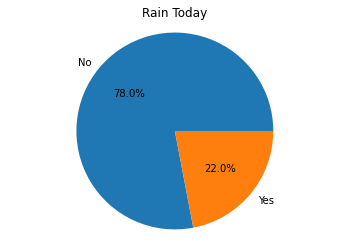

In [17]:
#pie chart of RainToday
import matplotlib.pyplot as plt
labels = ['No', 'Yes']
sizes = [55412, 15631]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Rain Today')
plt.show()

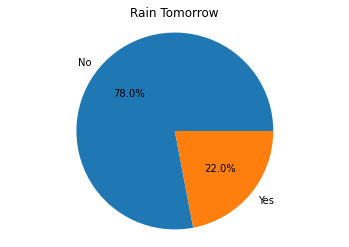

In [18]:
#pie chart of RainTomorrow
import matplotlib.pyplot as plt
labels = ['No', 'Yes']
sizes = [55402, 15641]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Rain Tomorrow')
plt.show()

In [19]:
#RainTomorrow based on Cloud3pm
data.groupby(['Cloud3pm_code']).count()['RainTomorrow'].sort_values(ascending=False)

Cloud3pm_code
Berawan          37600
Tidak_Berawan    33443
Name: RainTomorrow, dtype: int64

In [20]:
#RainTomorrow based on RainToday
data.groupby(['RainToday']).count()['RainTomorrow'].sort_values(ascending=False)

RainToday
0.0    55412
1.0    15631
Name: RainTomorrow, dtype: int64

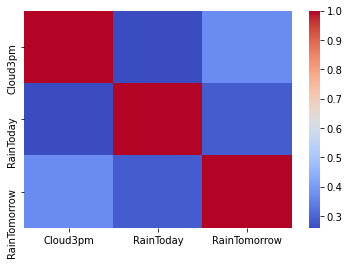

In [21]:
#correlation matrix
import seaborn as sns
sns.heatmap(data.corr(), cmap='coolwarm')

In [22]:
data['Cloud3pm_code'].replace({'Tidak_Berawan': 0, 'Berawan': 1}, inplace = True)
data = data[['Cloud3pm_code','RainToday','RainTomorrow']]
x = data[['Cloud3pm_code','RainToday']]
y = data[['RainTomorrow']]
data

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Cloud3pm_code,RainToday,RainTomorrow
2,0,0.0,0.0
4,1,0.0,0.0
11,1,1.0,1.0
13,1,1.0,0.0
16,0,0.0,1.0
...,...,...,...
145428,0,0.0,0.0
145432,1,0.0,0.0
145433,0,0.0,0.0
145452,1,0.0,0.0


In [23]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [24]:
#model training
tree = DecisionTreeClassifier(criterion = 'entropy').fit(x_train, y_train)

In [25]:
#model testing
predict = tree.predict(x_test)

In [26]:
#calculate the accuracy of model
score = tree.score(x_test, y_test)*100
print('Persentase akurasi :', score,'%')

Persentase akurasi : 78.53161421091156 %


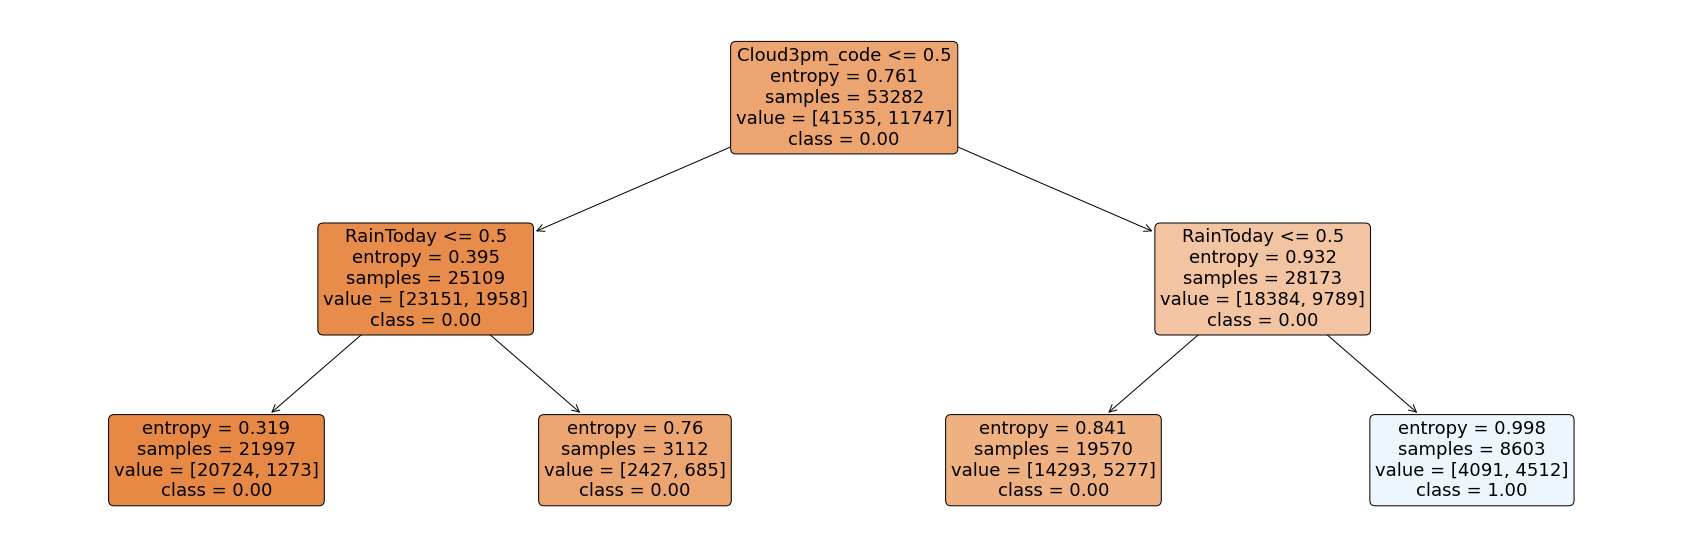

In [27]:
#visualize the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
y = ['Cloud3pm_code','RainToday']
plt.figure(figsize = (30,10))
plot = plot_tree(tree,
                 feature_names=y,
                 class_names=['{:.2f}'.format(x) for x in tree.classes_],
                 filled=True, 
                 rounded=True, 
                 fontsize=18)